# 29회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [5]:
#encoding = ['utf-8','cp949','utf-8-sig','euc-kr','latin']
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv',encoding= 'cp949')
df.head()

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거


In [6]:
# 아파트 이름과 아파트 ID는 동일한 정보를 나타내기 때문에 아파트 이름을 삭제
df2 = df.drop(['퇴거연도', '아파트 이름'],axis =1)

## 1-1  계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [12]:
df3 = df2.sort_values(by="거주연도", ascending=False).groupby("계약자고유번호").head(1)

# 결과 출력
df3

,순번,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,...,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
86903,12883,유효,2,36,3,8.0,86891,14,15,85274,...,2018,2020,45000,2365000,52,51,남,미혼,1,미퇴거
9330,1353,유효,10,234,1,5.0,6134,1,12,61285,...,2002,2020,36400,2062000,69,68,여,미혼,1,미퇴거
52192,7850,유효,11,298,2,7.0,52181,2,12,41544,...,1996,2020,61920,4671600,61,60,남,미혼,2,미퇴거
52179,7849,유효,10,222,2,7.0,52168,2,12,31740,...,2003,2020,154080,11624400,79,78,여,미혼,1,미퇴거
9343,1354,유효,10,234,1,5.0,6160,1,12,61298,...,2002,2020,53100,4323000,89,88,여,미혼,2,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35795,5372,해지,4,78,1,5.0,41112,12,15,70360,...,2002,2008,48700,2372000,74,61,남,기혼,4,퇴거
35536,5339,해지,4,77,1,5.0,40624,11,12,52664,...,2002,2008,39200,1907000,102,89,남,미혼,1,퇴거
73108,10838,해지,3,68,2,7.0,73109,15,19,19723,...,2002,2008,53900,2822000,59,46,여,미혼,6,퇴거
35614,5353,해지,1,15,1,5.0,40782,11,15,74447,...,2007,2008,47300,2303000,41,28,여,미혼,2,퇴거


## 1-2 결측치 처리

In [14]:

df3.dropna(inplace = True)
df3.isnull().sum()

순번         0
계약구분       0
재계약횟수      0
거주개월       0
아파트 ID     0
아파트 평점     0
호실고유번호     0
층          0
평형대        0
계약자고유번호    0
계약서고유번호    0
입주연도       0
거주연도       0
월세(원)      0
보증금(원)     0
대표나이       0
나이         0
성별         0
결혼여부       0
거주자 수      0
퇴거여부       0
dtype: int64

## 1-3 이상치 처리

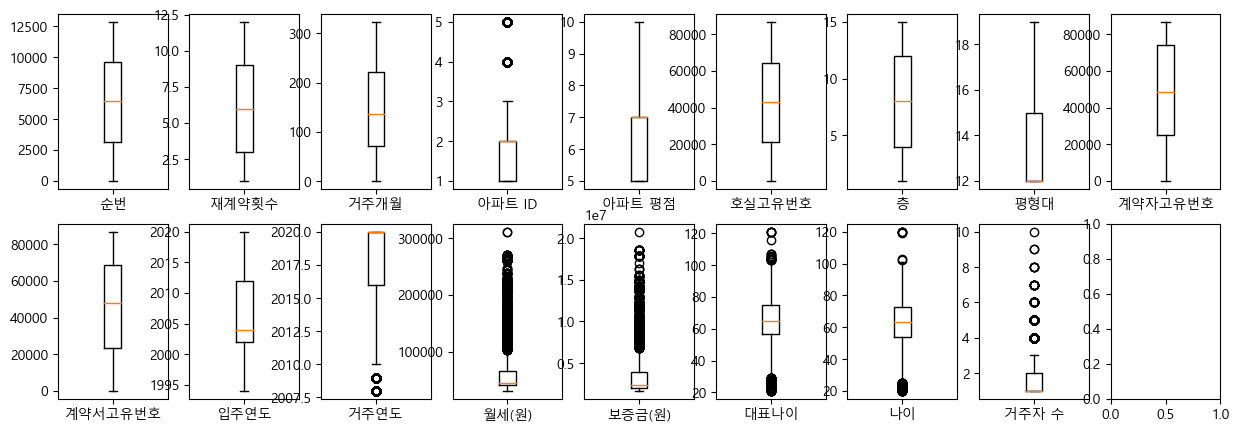

In [17]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2,9,figsize = (15,5))

feats = [col for col in df3.columns if df3[col].dtypes != object]
for ax, col in zip(axes.ravel(), feats):
    ax.boxplot(df3[[col]])
    ax.set_xticklabels([col])
plt.show()

In [19]:
#대표나이, 나이 이상치 조정처리
feat2 = ['대표나이', '나이']
for col in feat2:
    df3[col] = df3[col].clip(20,100)
df3[feat2].describe()

,대표나이,나이
count,10148.000000,10148.000000
mean,65.856523,62.616181
std,13.722564,14.141934
min,21.000000,20.000000
25%,57.000000,54.000000
50%,65.000000,63.000000
75%,75.000000,73.000000
max,100.000000,100.000000


In [20]:
# 기타 전처리: 범주형 변수들을 전처리함
df3['계약구분'] = df3['계약구분'].map({"유효" : 1, "해지" : 0})
df3['성별'] = df3['성별'].map({'남': 1,'여':0})
df3['결혼여부'] = df3['결혼여부'].map({'기혼': 1, '미혼': 0})
df3['퇴거여부'] = df3['퇴거여부'].map({'미퇴거':1, '퇴거' : 0})

## 2-1 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 '높음', 작으면 '낮음' 으로 재계약 횟수 이분 변수를 구성하시오.

In [21]:
med = df3['재계약횟수'].median()
df3['target'] = df3['재계약횟수'].apply(lambda x :1 if x>=med else 0)
df3.head(3)

,순번,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,...,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부,target
86903,12883,1,2,36,3,8.0,86891,14,15,85274,...,2020,45000,2365000,52,51,1,0,1,1,0
9330,1353,1,10,234,1,5.0,6134,1,12,61285,...,2020,36400,2062000,69,68,0,0,1,1,1
52192,7850,1,11,298,2,7.0,52181,2,12,41544,...,2020,61920,4671600,61,60,1,0,2,1,1


## 2-2 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

In [23]:
y = df3['재계약횟수']
X_features = df3.drop('재계약횟수', axis=1)

<AxesSubplot:>

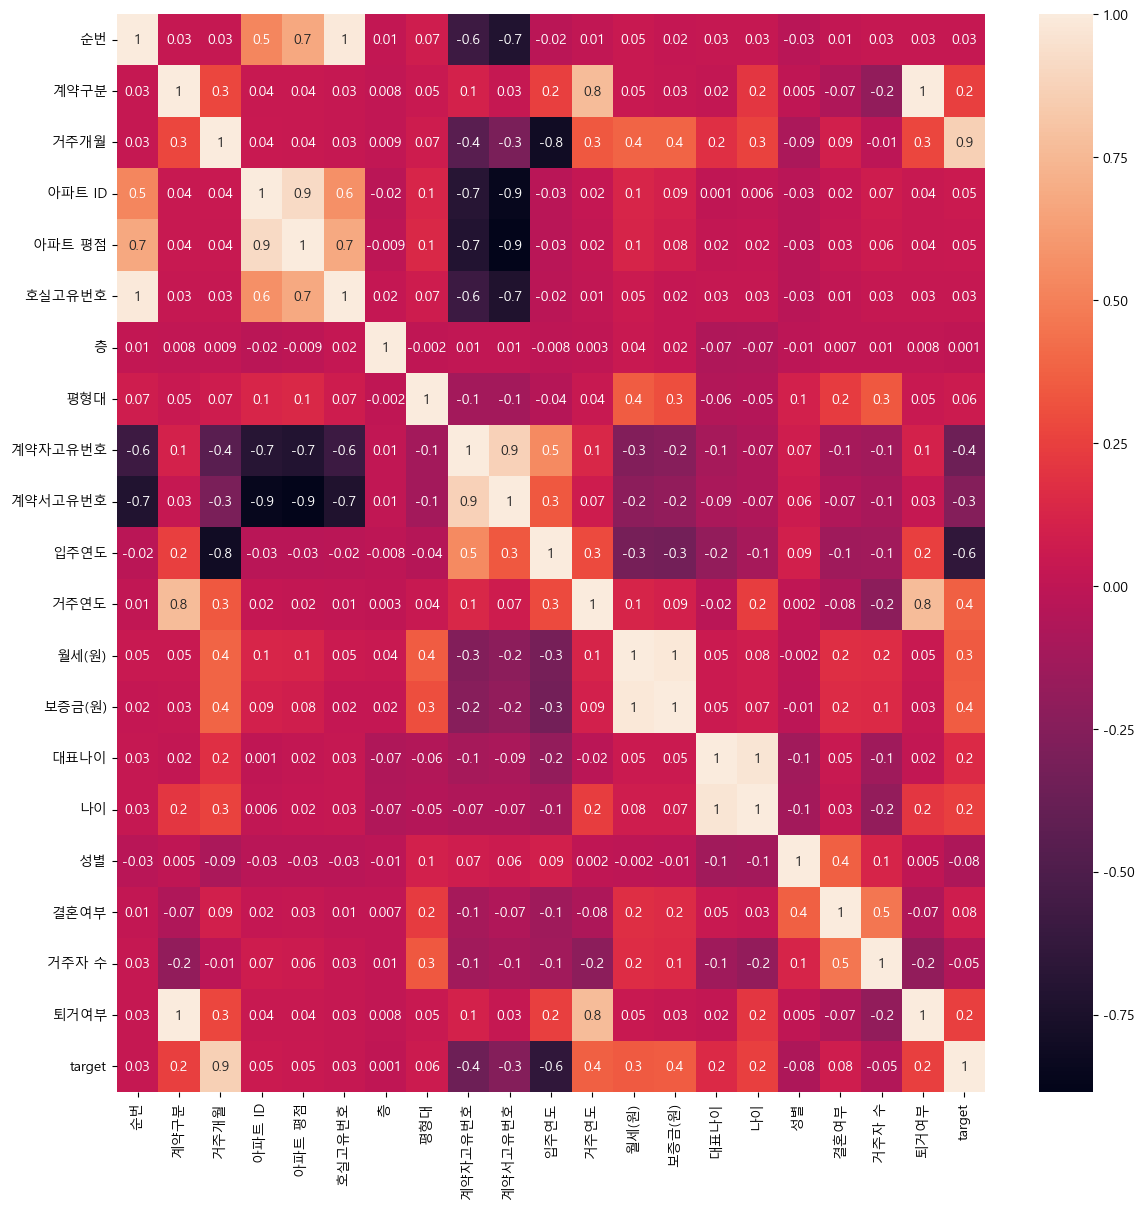

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [25]:
#시각화 결과 대표나이-나이, 월세(원)-보증금(원), 계약자고유번호-계약서고유번호, 아파트 ID - 아파트 평점, 아파트 평점 - 호실고유번호가 높은 상관관계가 있는 것을 알 수 있다.
#해당 변수들을 기준을 차원 축소를 할 필요가 있어 보인다.

## 3-1 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

## 3-2. 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from pandas import DataFrame
import numpy as np
X = df3.drop(['재계약횟수','target'],axis = 1)
ss = StandardScaler()
scaled = ss.fit_transform(X)

y = df3['재계약횟수']
print('선형회귀결과')
X_train, X_test, y_train, y_test = train_test_split(scaled , y)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#print(lr.score(X_train,y_train), lr.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
result = DataFrame({'feat':X.columns, 'coef':lr.coef_})
result['abs_coef'] = result['coef'].apply(lambda x : np.abs(x))
result.sort_values(by='abs_coef',ascending = False).head(5)

print('랜덤포레스트 결과')
model = RandomForestRegressor()
model.fit(X = X_train, y = y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))

#랜덤 포레스트 결과가 더 좋으므로 랜덤포레스트 모델을 채택

선형회귀결과
0.6681531094132296
랜덤포레스트 결과
0.43150122191564844


In [35]:
# 분류 분석  -로지스틱 회귀
from sklearn.linear_model import LogisticRegression
y = df3['target']
X_train, X_test, y_train, y_test = train_test_split(scaled , y, stratify = y)
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train),lr.score(X_test,y_test))
result = DataFrame({'feat':X.columns,'coef':lr.coef_.ravel()})
result['abs_coef'] = result['coef'].apply(lambda x : np.abs(x))
result.sort_values(by='abs_coef', ascending = False).head(5)

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
lr = RandomForestClassifier()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test,pred))
# 랜덤 포레스트 모델 채택

0.9586125344895546 0.9625541978715018
0.9767441860465116


## 3-3 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

In [43]:
ser = pd.Series(lr.feature_importances_, index = X.columns)

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)

# 거주개월, 입주년도, 계약자 고유번호가 가장 유의한 변수로 보인다.

거주개월       0.496690
입주연도       0.141375
계약자고유번호    0.089554
거주연도       0.075882
보증금(원)     0.041380
계약서고유번호    0.036034
월세(원)      0.022296
계약구분       0.021488
나이         0.015812
퇴거여부       0.015624
대표나이       0.009166
호실고유번호     0.008261
순번         0.007424
거주자 수      0.005279
층          0.005096
dtype: float64


## 3-4 해당 데이터 분석결과로 얻을 수 있는 점 제시

In [44]:
print('아파트 재계약시 중요한 점은 거주개월, 입주년도, 계약자 고유번호이므로 이 점을 유의하여 재계약을 진행할 수 있다.')

아파트 재계약시 중요한 점은 거주개월, 입주년도, 계약자 고유번호이므로 이 점을 유의하여 재계약을 진행할 수 있다.


## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv
- 데이터 설명 : 

A 야구구단의 시합 결과중 일부를 나타낸다.    
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.     
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 '수치 의미' 열을 통해 확인 할 수 있다.


<img src="https://github.com/Datamanim/datarepo/blob/main/adp/29/p1_img.png?raw=true" width="500" height="600">

## 4-1 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)     

조건1 : 득점여부를 범주형 종속변수로 한다. (1점이상 득점 :1, 무득점 :0)     
조건2 : 각 회차 2번 타자의 데이터는 원핫 인코딩한다.    
조건3 : 학습에 적절하지 않은 데이터는 제외한다.    

제가 이해하고 의도한 29회 4-1번 문제에 대한 가이드 입니다.
(4-1) 전처리 가이드
1. 첫타자와 둘째타자의 각 이닝별 출루현황, 해당 이닝의 득점수를 3columns의 데이터로 변환
2. 정수형 값이 아닌 데이터 행를 제거
3. 홈런 (4)값을 가지는 행을 제거
4. 이닝별 점수를 binary로 변환 (득점 있으면 1 ,없으면 0 )
5. 둘째 타자 출루 결과를 one-hot encoding

## 4-2 4-1 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

## 4-3 SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

## 4-4 4-3 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

## 4-5 4-3 구성 데이터에 XGB 적용하고 결과를 분석하라

# 통계 (40점)

## 5. 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [46]:
import math

# 주어진 값
n = 25  # 시행 횟수 (제품 개수)
k = 3   # 성공 횟수 (불량품 개수)
p = 0.03  # 성공 (불량품) 확률

# 이항 확률 질량 함수 계산
probability = math.comb(n, k) * (p**k) * ((1 - p)**(n - k))

# 결과 출력 (소수점 다섯 째 자리에서 반올림)
result = round(probability, 5)
print(result)


0.03177


## 6. C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

In [47]:
import numpy as np
from scipy import stats

# 주어진 데이터
n1 = 1000  # C사 제품 수
p1 = 0.6   # C사 양품률
n2 = 500   # D사 제품 수
p2 = 0.4   # D사 양품률

# 총 양품률 p 계산
p = (n1 * p1 + n2 * p2) / (n1 + n2)

# Z-검정 통계량 계산
z = (p1 - p2) / np.sqrt(p * (1 - p) * (1/n1 + 1/n2))

# 양측 검정을 위한 p-값 계산
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 결과 출력
if p_value < alpha:
    print("귀무가설을 기각합니다. C사와 D사의 양품률은 다릅니다.")
else:
    print("귀무가설을 기각하지 못합니다. C사와 D사의 양품률은 같을 가능성이 있습니다.")


귀무가설을 기각합니다. C사와 D사의 양품률은 다릅니다.


## 7. 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

dataurl : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv

### 7-1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

In [51]:
data=pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
data

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693
5,B,14.297589
6,B,19.737638
7,B,17.302304
8,B,13.591577
9,B,16.627680


In [53]:
from scipy.stats import f_oneway
groups = [data[data['name'] == name]['ratio'] for name in data['name'].unique()]
f_statistic, p_value = f_oneway(*groups)

# 결과 출력
alpha = 0.05  # 유의수준 설정
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("차종 별 범퍼 파손 정도에 차이가 있음 (귀무가설 기각)")
else:
    print("차종 별 범퍼 파손 정도에 차이가 없음 (귀무가설 기각 못함)")

F-Statistic: 24.9770
P-Value: 0.0000
차종 별 범퍼 파손 정도에 차이가 있음 (귀무가설 기각)


### 7-2 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

In [55]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# ANOVA 모델 생성
model = ols('ratio ~ name', data=data).fit()

# Tukey's HSD 검정 수행
tukey_result = sm.stats.multicomp.pairwise_tukeyhsd(endog=data['ratio'], groups=data['name'], alpha=0.05)

# 결과 출력
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


## 8. L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [49]:
# 각 라인에서 생산되는 확률
P_L1 = 0.13
P_L2 = 0.37
P_L3 = 0.50

# 각 라인에서의 불량률
P_Defective_L1 = 0.011
P_Defective_L2 = 0.021
P_Defective_L3 = 0.033

# 불량 제품이 나올 확률
P_Defective = P_L1 * P_Defective_L1 + P_L2 * P_Defective_L2 + P_L3 * P_Defective_L3

# 불량 제품이 L1 라인에서 생산될 확률
P_L1_Defective = (P_L1 * P_Defective_L1) / P_Defective

# 결과 출력 (소수점 둘째 자리에서 반올림)
result = round(P_L1_Defective, 2)
print(result)


0.06


created by datamanim [web-link](https://www.datamanim.com)

#### 끝. 10페이지